# Project: Prediction to determine income
(https://archive.ics.uci.edu/ml/datasets/adult)


### Abstract:

Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.

### Data Set Information:

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) 

Prediction task is to determine whether a person makes over 50K a year.

### Attribute Information:

Listing of attributes: >50K, <=50K. 

|Attribute|	|Description|
|--|	|--|
|age:| |continuous.| 
|workclass:| |Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.|
|fnlwgt:| |continuous.|
|education:| |Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.|
|education-num:| |continuous.| 
|marital-status:| |Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.|
|occupation:| |Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.|
|relationship:| |Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.| 
|race:| |White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black| 
|sex:| |Female, Male.|
|capital-gain:| |continuous.| 
|capital-loss:| |continuous.| 
|hours-per-week:| |continuous.| 
|native-country:| |United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands|

### Problem Statement:

Predict whether income exceeds $50K/yr based on census data.

### 1) Import basic libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.preprocessing import Imputer
import matplotlib.pyplot as plt
%matplotlib inline

### 2) Download the data and EDA

In [2]:
train_set=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',header=None)
test_set=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test',header=None,skiprows=1)

### The train data looks like:

In [3]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Test data looks like:

In [4]:
test_set.tail(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.
16280,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K.


### Data dimension

In [5]:
print('The training data shape:',train_set.shape)
print('The test data shape:',test_set.shape)

The training data shape: (32561, 15)
The test data shape: (16281, 15)


### Points to note:

- There are no column headers on the table

- The data set contains null values like **"?"**

- The last column of train and test data is populated with different type of values like **<=50K and <=50K.**

### 3) Data Cleaning

### Set the columns name:

In [6]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']

train_set.columns=col_labels
test_set.columns=col_labels

In [7]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Check NA values

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
wage_class        32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
age               16281 non-null int64
workclass         16281 non-null object
fnlwgt            16281 non-null int64
education         16281 non-null object
education_num     16281 non-null int64
marital_status    16281 non-null object
occupation        16281 non-null object
relationship      16281 non-null object
race              16281 non-null object
sex               16281 non-null object
capital_gain      16281 non-null int64
capital_loss      16281 non-null int64
hours_per_week    16281 non-null int64
native_country    16281 non-null object
wage_class        16281 non-null object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


There are no null data in the table but the values are **"?"**

### Replace ? and drop the null value

In [10]:
train_set_no_missing=train_set.replace(' ?', np.nan).dropna()

In [11]:
test_set_no_missing=test_set.replace(' ?', np.nan).dropna()

In [12]:
print('New training data set dimension:',train_set_no_missing.shape)
print('New test data set dimension:',test_set_no_missing.shape)
print('Dropped rows in training dataset:',train_set.shape[0]-train_set_no_missing.shape[0])
print('Dropped rows in test dataset:',test_set.shape[0]-test_set_no_missing.shape[0])

New training data set dimension: (30162, 15)
New test data set dimension: (15060, 15)
Dropped rows in training dataset: 2399
Dropped rows in test dataset: 1221


### Clean the wage_class for test data

In [13]:
test_set_no_missing['wage_class']=test_set_no_missing.wage_class.replace({' <=50K.':' <=50K',' >50K.':' >50K'})

### 4) Encode the string to numbers

In [14]:
#Combine the train and test data
combined=pd.concat([train_set_no_missing,test_set_no_missing],axis=0)

In [15]:
print('Dimension of combined dataframe:',combined.shape)

Dimension of combined dataframe: (45222, 15)


In [16]:
np.unique(combined.wage_class)

array([' <=50K', ' >50K'], dtype=object)

In [17]:
for feature in combined.columns:    #Loop over all columns of the table
    if combined[feature].dtype=='object':  #Apply only if the column is obejcet data type
        combined[feature]=pd.Categorical(combined[feature]).codes  #Replace string with integer

### Let's look at the combined data frame now

In [18]:
combined.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0


### Let us split the data now in train and test

We never sorted the dataframe hence we can easily split them by use their initial shape

In [19]:
final_train=combined[:train_set_no_missing.shape[0]]  #take the row of training data
final_test=combined[train_set_no_missing.shape[0]:]        #take whatever left to test dataframe   

### Let us check the corelation between variables

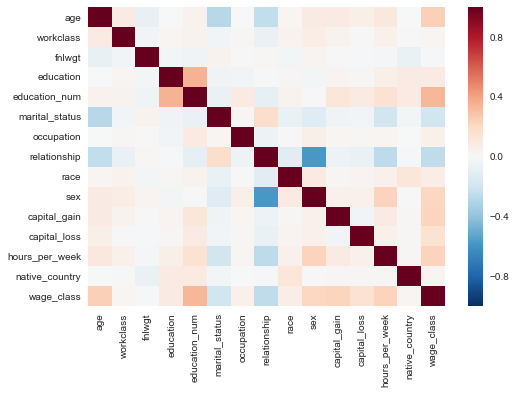

In [20]:
import seaborn as sns
sns.heatmap(final_train.corr())

It looks good that the variables are not co-related

### 5) Start Applying Machine Learning

Separate predictor variable

In [21]:
y_train=final_train.pop('wage_class')

In [22]:
y_test=final_test.pop('wage_class')

In [23]:
final_train.shape

(30162, 14)

### XG Boost algorithm

In [24]:
#!pip3 install xgboost         #----one time installation

In [25]:
#Ignore future warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
from xgboost import XGBClassifier  #import xgboost classifier
from sklearn.grid_search import GridSearchCV

Grid search parameters

In [27]:
cv_params={'max_depth':[3,5,7],'min_child_weight':[1,3,5]}
ind_params={'learning_rate':0.1,'n_estimators':1000,'objective':'binary:logistic',
            'seed':0,'colsample_bytree':0.8,'subsample':0.8}
optimised_GBM=GridSearchCV(XGBClassifier(**ind_params),cv_params,scoring='accuracy',cv=5,n_jobs=-1)

In [28]:
%time optimised_GBM.fit(final_train,y_train)

Wall time: 12min 4s


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0, silent=True,
       subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [29]:
optimised_GBM.grid_scores_

[mean: 0.86712, std: 0.00225, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.86659, std: 0.00339, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.86659, std: 0.00295, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.86214, std: 0.00197, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.86161, std: 0.00143, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86208, std: 0.00236, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.85651, std: 0.00183, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.85575, std: 0.00246, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.85694, std: 0.00347, params: {'max_depth': 7, 'min_child_weight': 5}]

Best parameters from grid search result-

learning rate=0.1, max_depth: 3, min_child_weight:1, subsample and colsample_by_tree:0.8

### Let us use grid search result into XGboost and use early stopping to avoid overfitting

In [30]:
import xgboost
#use of dmatrix internal data structure 
xgdmat=xgboost.DMatrix(final_train,y_train,silent=True)

In [31]:
best_param={'eta':0.1,'seed':0,'max_depth':3,'min_child_weight':1,
            'objective':'binary:logistic','colsample_bytree':0.8,'subsample':0.8 }

cv_xgb=xgboost.cv(best_param,dtrain=xgdmat,num_boost_round=3000,nfold=5,
                  metrics=['error'],early_stopping_rounds=100,verbose_eval=1000)

[17:03:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:03:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:03:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:03:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:03:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[0]	train-error:0.191416+0.00412395	test-error:0.19309+0.0101365
[17:03:02] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:03:02] C:\Users\Administr

In [32]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
489,0.129998,0.004691,0.115584,0.001395
490,0.129965,0.004479,0.115617,0.001414
491,0.129965,0.004494,0.115501,0.001397
492,0.129964,0.004581,0.115501,0.001483
493,0.129932,0.004657,0.115385,0.001528


Early stopping last loop is at 493 and error at last loop is 12.9932%, accuracy is 87.0068%

### Let us train the model with the loop

In [33]:
final_gb=xgboost.train(params=best_param,dtrain=xgdmat,num_boost_round=493,verbose_eval=50)

[17:04:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:04:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:04:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:04:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:04:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:04:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:04:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

### Plot feature importance

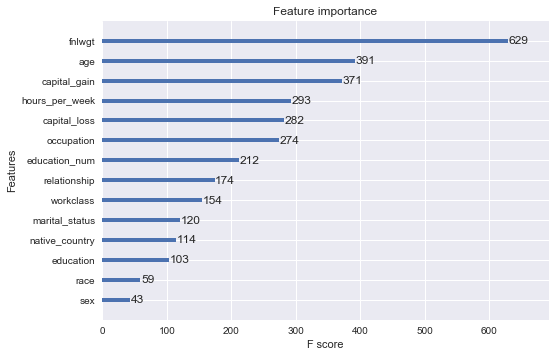

In [34]:
xgboost.plot_importance(final_gb)

The feature **fnlwgt** is having the most importance in prediction. The next important features are **age** and **capital gain**, which make sense as earning should be related with age and investment capability. **Race** and **sex** have least importance in the prediction.

### Let us check the model accuracy on test dataset

In [35]:
#Convert test data in Dmatrix of xgboost
xgbdtest=xgboost.DMatrix(final_test)

In [36]:
y_pred=final_gb.predict(xgbdtest)
y_pred

array([0.00289687, 0.2055959 , 0.29231712, ..., 0.8459931 , 0.14419174,
       0.7777018 ], dtype=float32)

In [37]:
#Make the prediction as using 0.5 as thershold value
y_pred=np.round(y_pred)

In [38]:
#Check accuracy
print('Accuracy on test data:', metrics.accuracy_score(y_test,y_pred),
      '\nError on test data:',(1-metrics.accuracy_score(y_test,y_pred)))

Accuracy on test data: 0.8685922974767596 
Error on test data: 0.1314077025232404


Using **XGboost** algorithm accuracy on train and test data looks similar as close to **87%**

### Apply Random forest

Let us apply random forest and see whether accuracy is improving

In [39]:
from sklearn.ensemble import RandomForestClassifier

rf_cls=RandomForestClassifier()
cv_params={'n_estimators':[10,20,30,40,100],'criterion':['gini','entropy'],
           'max_depth':[15,20,25],'min_samples_split':[2,4,6]}

rf_grd=GridSearchCV(rf_cls,cv_params,cv=5)
rf_grd.fit(final_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 20, 30, 40, 100], 'criterion': ['gini', 'entropy'], 'max_depth': [15, 20, 25], 'min_samples_split': [2, 4, 6]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [40]:
print('Our best parameters are:',rf_grd.best_params_)

Our best parameters are: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 4, 'n_estimators': 100}


Train the RF model with best parameters

In [41]:
rf_cls_best=RandomForestClassifier(criterion='gini',max_depth=15,min_samples_split=4,n_estimators=100,random_state=1)
rf_cls_best.fit(final_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=4, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

Accuracy on training data

In [42]:
y_train_pred=rf_cls_best.predict(final_train)
metrics.accuracy_score(y_train,y_train_pred)

0.89814999005371

Prediction on test dataset

In [43]:
y_pred_rf=rf_cls_best.predict(final_test)

Accuracy on test dataset

In [44]:
metrics.accuracy_score(y_test,y_pred_rf)

0.8586321381142098

In [45]:
metrics.confusion_matrix(y_test,y_pred_rf)

array([[10705,   655],
       [ 1474,  2226]])

The Random Forest accuracy is 85.96% but it is **lower than XGboost**

### Apply Adaboost

In [46]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [47]:
ada_cls=ada.fit(final_train,y_train)
y_pred_ada_train=ada_cls.predict(final_train)

In [48]:
print('Accurcay of adaboost on training data:',metrics.accuracy_score(y_train,y_pred_ada_train))

Accurcay of adaboost on training data: 0.8582985213182149


In [49]:
metrics.confusion_matrix(y_train,y_pred_ada_train)

array([[21311,  1343],
       [ 2931,  4577]])

Let us test in on test data

In [50]:
y_pred_ada_test=ada_cls.predict(final_test)

In [51]:
print('Accuracy of adaboost on test data:',metrics.accuracy_score(y_test,y_pred_ada_test))

Accuracy of adaboost on test data: 0.8555776892430279


In [52]:
metrics.confusion_matrix(y_test,y_pred_ada_test)

array([[10659,   701],
       [ 1474,  2226]])

The accuracy from Adaboost is not better than XGboost

### Apply Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [54]:
log_cls=log.fit(final_train,y_train)
y_pred_log_train=log_cls.predict(final_train)

In [55]:
metrics.accuracy_score(y_train,y_pred_log_train)

0.786784695975068

In [56]:
metrics.confusion_matrix(y_train,y_pred_log_train)

array([[21467,  1187],
       [ 5244,  2264]])

Let us test it on test data

In [57]:
y_pred_test_log=log_cls.predict(final_test)
print('Accuracy on test data for Logistic Regression:',metrics.accuracy_score(y_test,y_pred_test_log))
metrics.confusion_matrix(y_test,y_pred_test_log)

Accuracy on test data for Logistic Regression: 0.7862549800796813


array([[10751,   609],
       [ 2610,  1090]])

## Conclusion:

After applying different algorithm it is seen that XGboost has out performed all the other algorithms

In [58]:
import pickle
file_handle=open('Adult_data_model_xgb.hdf5','wb')
pickle.dump('final_gb',file_handle)